In [1]:
import sys
import numpy as np
import gymnasium
sys.modules["gym"] = gymnasium
import gym
import gymnasium as gym
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
#get our environment
env = gym.make('Taxi-v3',render_mode='rgb_array')

In [3]:
def get_q_table(state_shape, action_shape):
  Qtable = np.zeros(shape = (state_shape,action_shape))
  return Qtable

In [4]:
state_shape = env.observation_space.n # determine our space size for q table
action_shape = env.action_space.n # determine our space size for q table

print(state_shape, action_shape)

500 6


In [5]:
#check how it works
observation, info = env.reset()

for _ in range(10):
    action = env.action_space.sample()  
    observation, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        observation, info = env.reset()

env.close()
print(reward)

-10


In [6]:
#determine functions for greeady and epsilon greedy policy

def greedy_policy(Qtable, state):
  # greedy alghorimt
  action = np.argmax(Qtable[state][:])
  
  return action

def epsilon_greedy_policy(Qtable, state, epsilon):
  
  random_num = np.random.uniform(0,1) # randome generate

  if random_num > epsilon: #exploitation path
    
    action = greedy_policy(Qtable,state) # greedy choice
  
  else: #exploration path

    action = env.action_space.sample()
    # Take a random action

  return action

In [7]:
def train(n_training_episodes, min_epsilon, max_epsilon, 
          decay_rate,gamma,learning_rate, env, max_steps):
  
  
  
  state_n = env.observation_space.n
  action_n = env.action_space.n

  Qtable = get_q_table(state_n,action_n)

  total_rewards = []
  average_rewards_last_100 = []

  for episode in tqdm(range(n_training_episodes)):

    total_reward = 0
     
    # getting from explore to exploit
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    # Reset the environment
    state, info = env.reset()
    terminated = False
    truncated = False

    # cycle
    for step in range(max_steps):
      # Choose the action At greedy
      action = epsilon_greedy_policy(Qtable, state, epsilon)

      # Take action At and observe Rt+1 and St+1
      new_state, reward, terminated, truncated, info = env.step(action)

      total_reward += reward # reward accumulation

      # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
      Qtable[state][action] = Qtable[state][action] + learning_rate * (reward + gamma * np.max(Qtable[new_state]) - Qtable[state][action])

      # If terminated or truncated finish the episode
      if terminated or truncated:
        break

      # Our next state is the new state
      state = new_state
    
    total_rewards.append(total_reward)

    # Calculate the average reward for the last 100 episodes
    if len(total_rewards) >= 100:
      avg_reward_100 = np.mean(total_rewards[-100:])
      average_rewards_last_100.append(avg_reward_100)
    else:
      average_rewards_last_100.append(np.mean(total_rewards))

  return Qtable, total_rewards, average_rewards_last_100

In [8]:
# Environment parameters
max_steps = 150               # Max steps per episode
gamma = 0.9                 # Discounting rate

# Exploration parameters
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.1           # Minimum exploration probability
decay_rate = 0.01  

n_training_episodes = 10000   # Total training episodes
learning_rate = 0.5         # Learning rate


In [9]:
qtable_ready, total_rewards, average_rewards_last_100= train(n_training_episodes, min_epsilon, max_epsilon, decay_rate,gamma,learning_rate, env, max_steps)
qtable_ready

100%|██████████| 10000/10000 [00:02<00:00, 4105.78it/s]


array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -0.58576323,   0.45561577,  -0.58721413,   0.45796387,
          1.62261467,  -8.54411044],
       [  4.34791051,   5.94319247,   4.34844595,   5.94294603,
          7.7147    ,  -3.05678238],
       ...,
       [  7.70967218,   9.683     ,   7.71407503,   5.94272357,
         -1.28553467,  -1.29333132],
       [ -3.88422408,  -3.92312551,  -3.85811883,   2.91399066,
        -10.01547734, -12.67340217],
       [ 13.59875488,   8.65874996,   7.55602548,  17.        ,
         -9.0875    ,   2.08563055]])

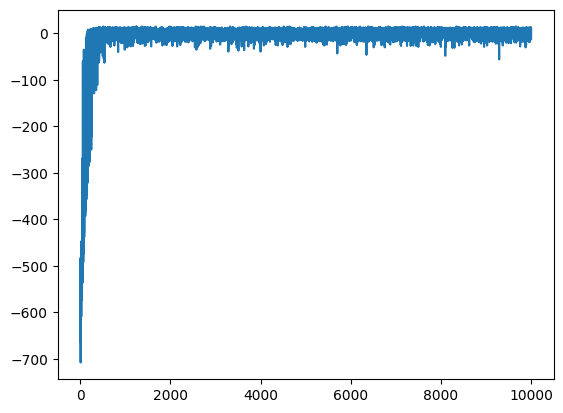

In [10]:
plt.plot(total_rewards)  

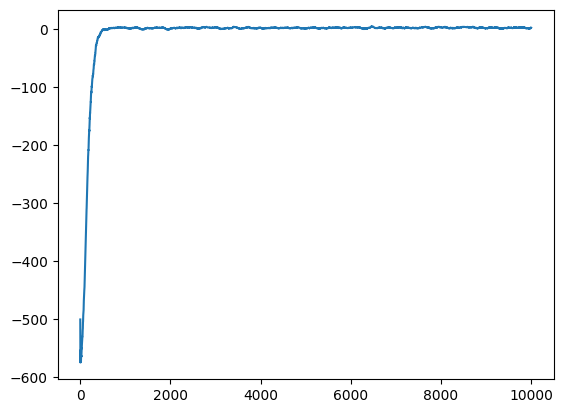

In [11]:
plt.plot(average_rewards_last_100)

In [12]:
np.save("qtable.npy", qtable_ready)

In [13]:
qtable_loaded = np.load("qtable.npy")

print(qtable_loaded)

[[  0.           0.           0.           0.           0.
    0.        ]
 [ -0.58576323   0.45561577  -0.58721413   0.45796387   1.62261467
   -8.54411044]
 [  4.34791051   5.94319247   4.34844595   5.94294603   7.7147
   -3.05678238]
 ...
 [  7.70967218   9.683        7.71407503   5.94272357  -1.28553467
   -1.29333132]
 [ -3.88422408  -3.92312551  -3.85811883   2.91399066 -10.01547734
  -12.67340217]
 [ 13.59875488   8.65874996   7.55602548  17.          -9.0875
    2.08563055]]
